In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

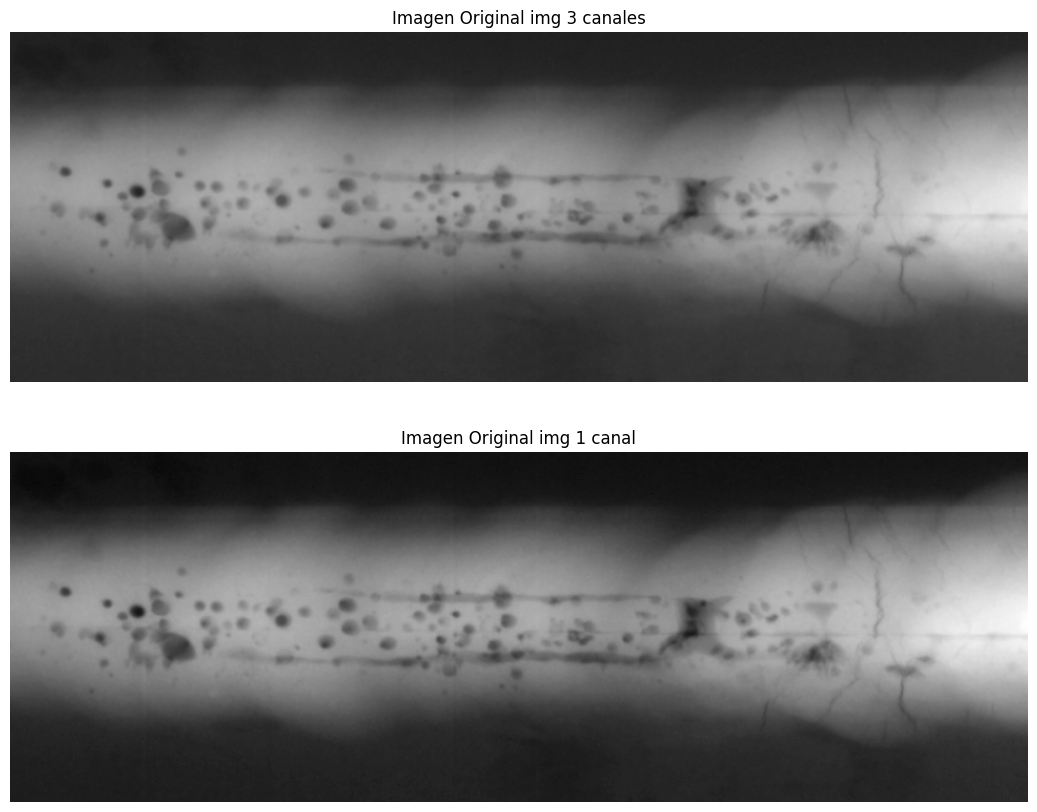

In [31]:
img =cv2.imread('fallas.tif')
img2 =cv2.imread('fallas.tif', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.imshow(img), plt.axis('off')
plt.title('Imagen Original img 3 canales')
plt.subplot(2, 1, 2)
plt.imshow(img2,cmap="gray"), plt.axis('off')
plt.title('Imagen Original img 1 canal')
plt.show()

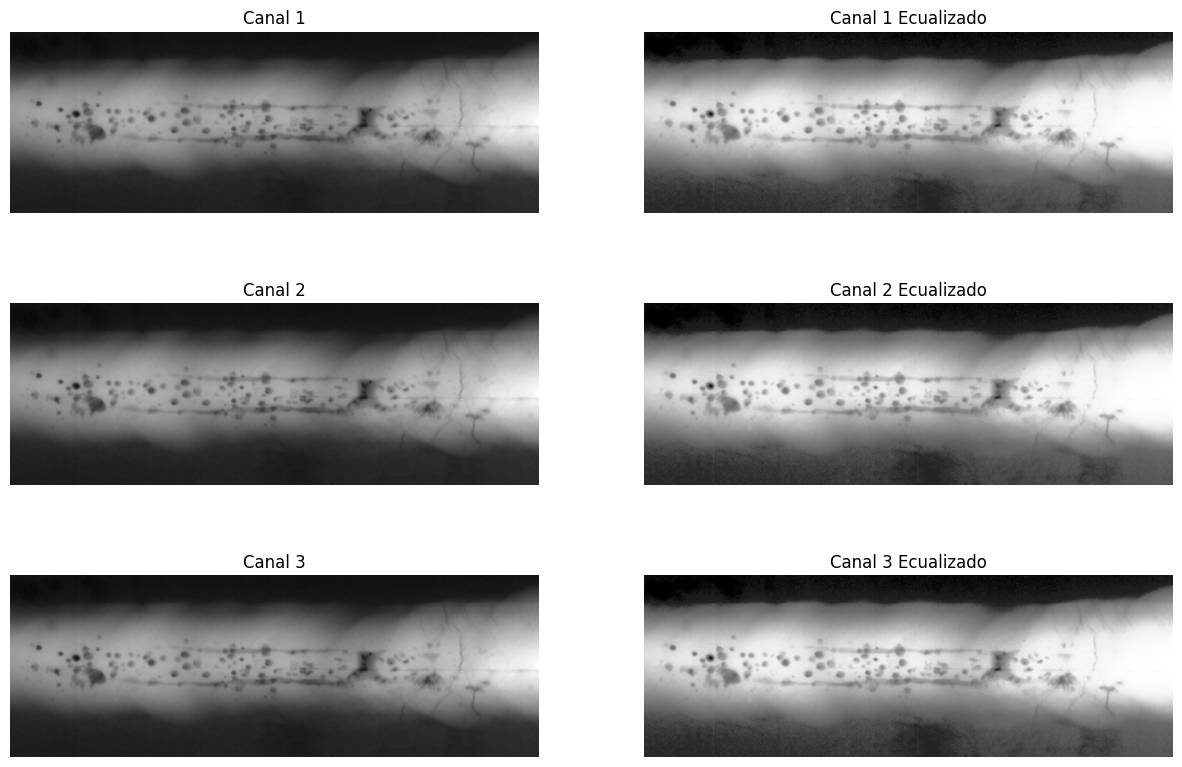

In [32]:
# PASO 2
canal_1, canal_2, canal_3 = cv2.split(img)
canal_1_eq = cv2.equalizeHist(canal_1)
canal_2_eq = cv2.equalizeHist(canal_2)
canal_3_eq = cv2.equalizeHist(canal_3)



plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
plt.imshow(canal_1, cmap='gray'), plt.axis('off')
plt.title('Canal 1')

plt.subplot(3, 2, 2)
plt.imshow(canal_1_eq , cmap='gray'), plt.axis('off')
plt.title('Canal 1 Ecualizado')

plt.subplot(3,2, 3)
plt.imshow(canal_2, cmap='gray'), plt.axis('off')
plt.title('Canal 2')

plt.subplot(3,2, 4)
plt.imshow(canal_2_eq, cmap='gray'), plt.axis('off')
plt.title('Canal 2 Ecualizado')

plt.subplot(3,2, 5)
plt.imshow(canal_3, cmap='gray'), plt.axis('off')
plt.title('Canal 3')
plt.subplot(3,2, 6)
plt.imshow(canal_3_eq , cmap='gray'), plt.axis('off')
plt.title('Canal 3 Ecualizado')

plt.show()


Text(0.5, 1.0, 'Canal 3 sin ruido')

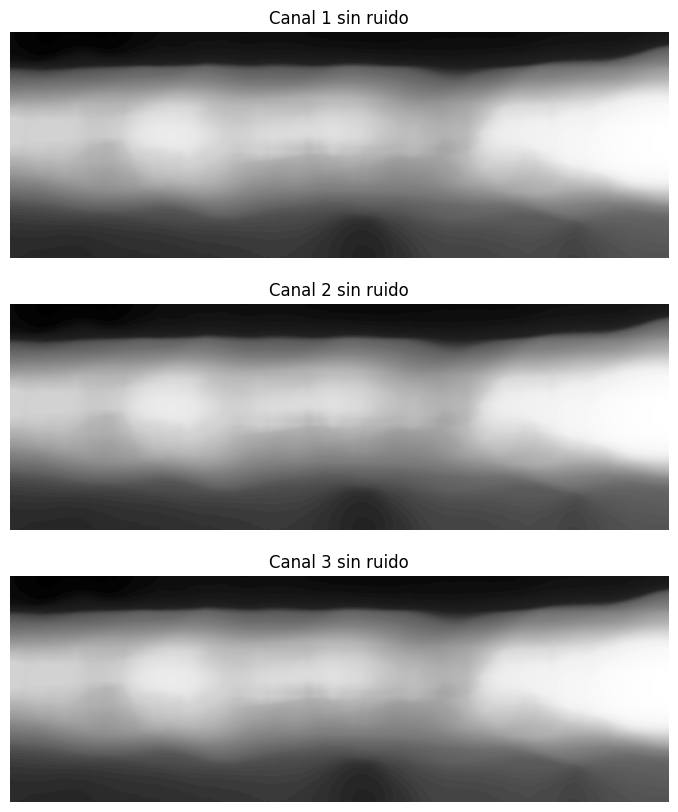

In [33]:
# PASO 3
canal_1_sin_ruido = cv2.medianBlur(canal_1_eq, 71)
canal_2_sin_ruido = cv2.medianBlur(canal_2_eq, 71)
canal_3_sin_ruido = cv2.medianBlur(canal_3_eq, 71)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.imshow(canal_1_sin_ruido, cmap='gray'), plt.axis('off')
plt.title('Canal 1 sin ruido')

plt.subplot(3, 1, 2)
plt.imshow(canal_2_sin_ruido, cmap='gray'), plt.axis('off')
plt.title('Canal 2 sin ruido')

plt.subplot(3, 1, 3)
plt.imshow(canal_3_sin_ruido, cmap='gray'), plt.axis('off')
plt.title('Canal 3 sin ruido')


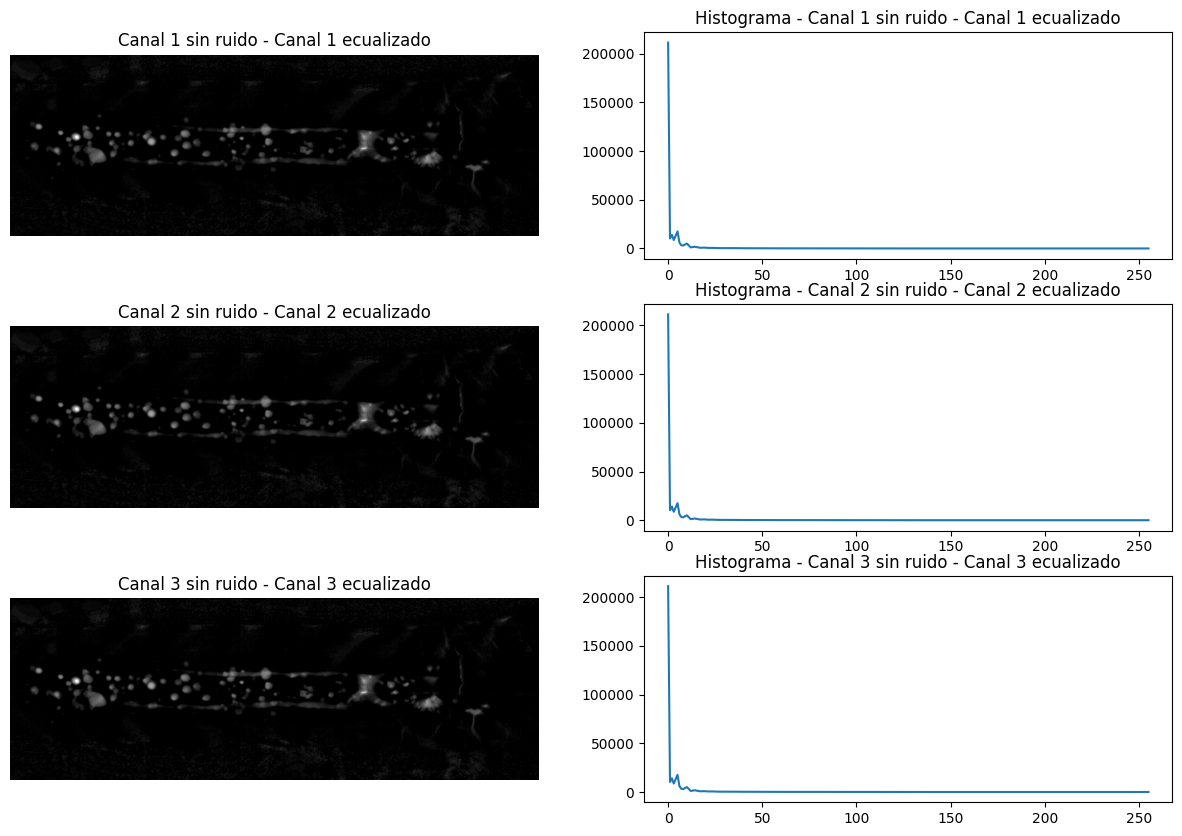

In [34]:
#PASO 4
# Restar la imagen del paso 3 con la del paso 2
img_resultado = cv2.subtract(canal_1_sin_ruido, canal_1_eq)
img_resultado2 = cv2.subtract(canal_2_sin_ruido, canal_2_eq)
img_resultado3 = cv2.subtract(canal_3_sin_ruido, canal_3_eq)

# Calcular los histogramas
hist_resultado = cv2.calcHist([img_resultado], [0], None, [256], [0,256])
hist_resultado2 = cv2.calcHist([img_resultado2], [0], None, [256], [0,256])
hist_resultado3 = cv2.calcHist([img_resultado3], [0], None, [256], [0,256])

# Mostrar las imágenes y sus histogramas
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.imshow(img_resultado, cmap='gray'), plt.axis('off')
plt.title('Canal 1 sin ruido - Canal 1 ecualizado')

plt.subplot(3, 2, 2)
plt.plot(hist_resultado)
plt.title('Histograma - Canal 1 sin ruido - Canal 1 ecualizado')

plt.subplot(3, 2, 3)
plt.imshow(img_resultado2, cmap='gray'), plt.axis('off')
plt.title('Canal 2 sin ruido - Canal 2 ecualizado')

plt.subplot(3, 2, 4)
plt.plot(hist_resultado2)
plt.title('Histograma - Canal 2 sin ruido - Canal 2 ecualizado')

plt.subplot(3, 2, 5)
plt.imshow(img_resultado3, cmap='gray'), plt.axis('off')
plt.title('Canal 3 sin ruido - Canal 3 ecualizado')

plt.subplot(3, 2, 6)
plt.plot(hist_resultado3)
plt.title('Histograma - Canal 3 sin ruido - Canal 3 ecualizado')

plt.show()



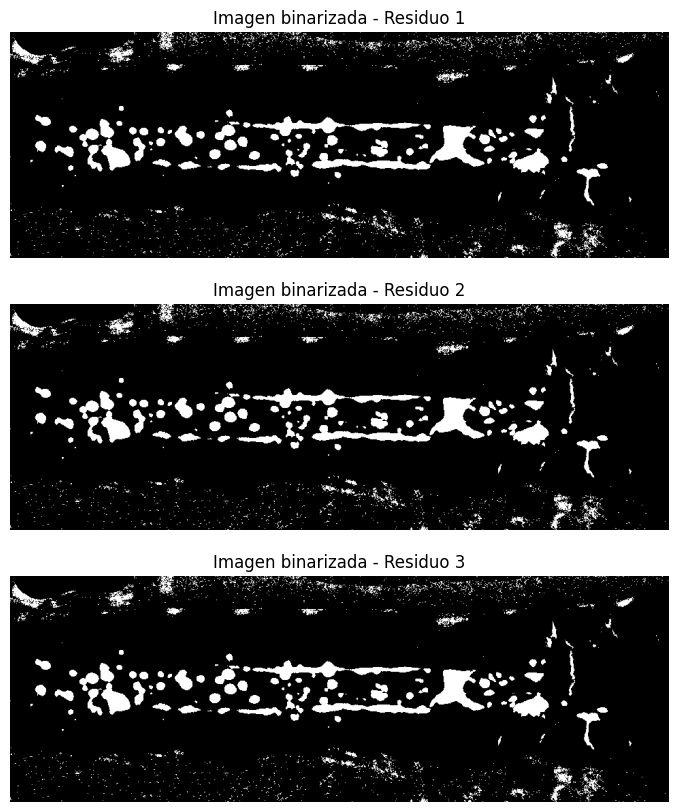

In [35]:
# paso 5

umbral = 10  # Se defina el umbral en base al histograma
_, canal_1_resultado_binarizada = cv2.threshold(img_resultado, umbral, 255, cv2.THRESH_BINARY)
_, canal_2_resultado_binarizada = cv2.threshold(img_resultado2,umbral, 255, cv2.THRESH_BINARY)
_, canal_3_resultado_binarizada = cv2.threshold(img_resultado3,umbral, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.imshow(canal_1_resultado_binarizada, cmap='gray'), plt.axis('off')
plt.title('Imagen binarizada - Residuo 1')

plt.subplot(3, 1, 2)
plt.imshow(canal_2_resultado_binarizada, cmap='gray'), plt.axis('off')
plt.title('Imagen binarizada - Residuo 2')

plt.subplot(3, 1, 3)
plt.imshow(canal_3_resultado_binarizada, cmap='gray'), plt.axis('off')
plt.title('Imagen binarizada - Residuo 3')

plt.show()







In [36]:
# paso 6
imagen_final = cv2.bitwise_and(canal_1_eq, canal_1_resultado_binarizada)
imagen_final2 = cv2.bitwise_and(canal_2_eq, canal_2_resultado_binarizada)
imagen_final3 = cv2.bitwise_and(canal_3_eq, canal_3_resultado_binarizada)



In [37]:
# Resultado de la TAREA 2
img =cv2.imread('fallas.tif', cv2.IMREAD_GRAYSCALE)
img_ecualizada = cv2.equalizeHist(img)
img_sin_ruido = cv2.medianBlur(img_ecualizada, 71)
img_resultado = cv2.subtract(img_sin_ruido, img_ecualizada)
umbral = 10
_, img_resultado_binarizada = cv2.threshold(img_resultado, umbral, 255, cv2.THRESH_BINARY)
imagen_final = cv2.bitwise_and(img_ecualizada, img_resultado_binarizada)


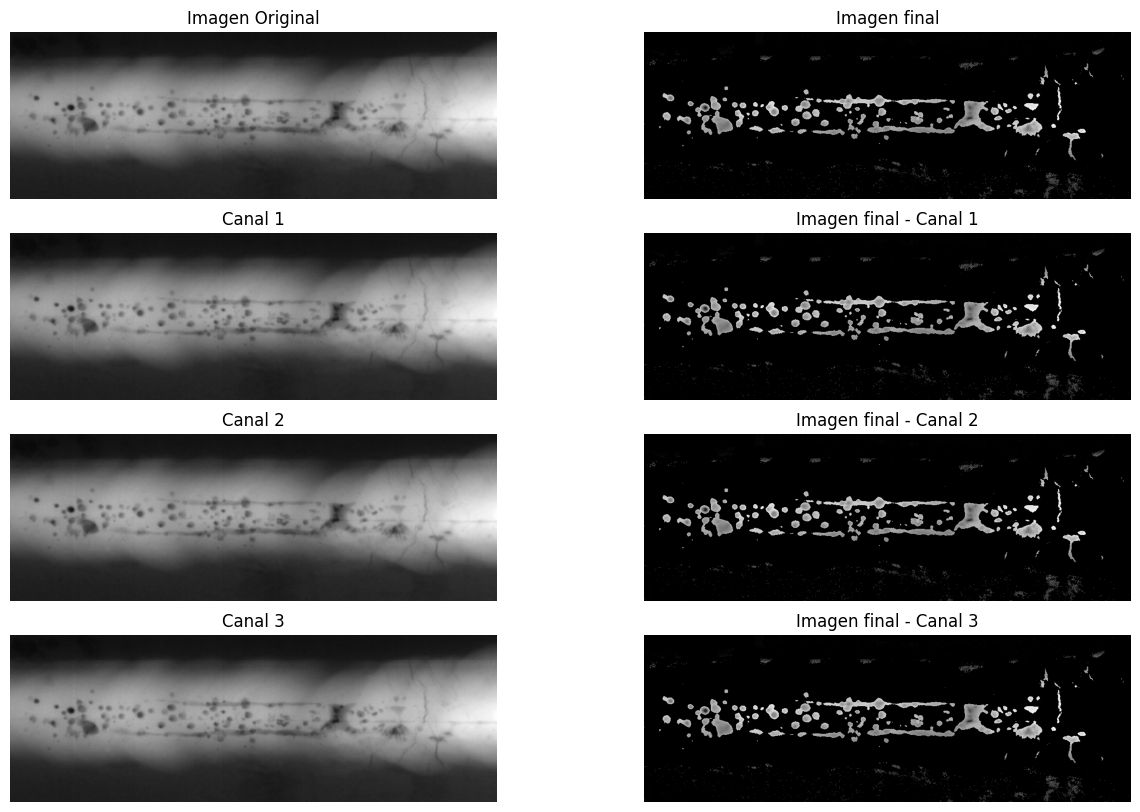

In [39]:
plt.figure(figsize=(15, 10))
plt.subplot(4, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen ecualizada
plt.subplot(4, 2, 2)
plt.imshow(imagen_final, cmap='gray')
plt.title('Imagen final')
plt.axis('off')

plt.subplot(4,2,3)
plt.imshow(canal_1, cmap='gray'), plt.axis('off')
plt.title('Canal 1')

plt.subplot(4,2,4)
plt.imshow(imagen_final, cmap='gray'), plt.axis('off')
plt.title('Imagen final - Canal 1')

plt.subplot(4,2,5)
plt.imshow(canal_2, cmap='gray'), plt.axis('off')
plt.title('Canal 2')

plt.subplot(4,2,6)
plt.imshow(imagen_final2, cmap='gray'), plt.axis('off')
plt.title('Imagen final - Canal 2')

plt.subplot(4,2,7)
plt.imshow(canal_3, cmap='gray'), plt.axis('off')
plt.title('Canal 3')
plt.subplot(4,2,8)
plt.imshow(imagen_final3, cmap='gray'), plt.axis('off')
plt.title('Imagen final - Canal 3')

plt.show()
